# 결정 트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [4]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

# 모델 시각화

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf,out_file='tree.dot',   #dt_clf 학습한 모델
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

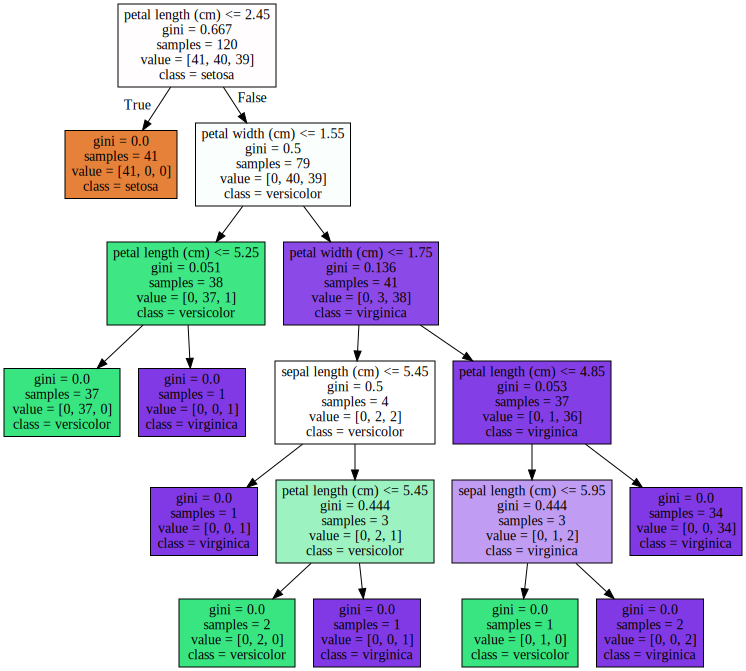

In [7]:
import graphviz

with open('tree.dot','r') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

## - 제약 조건
- max_depth =3인 경우

In [18]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

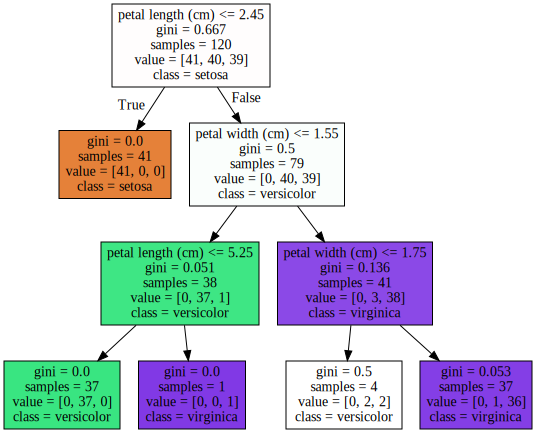

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf2,out_file='tree2.dot',   #dt_clf 학습한 모델
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

import graphviz

with open('tree2.dot','r') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test,pred2)

0.9333333333333333

## - min_samples_split = 4인 경우

In [22]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

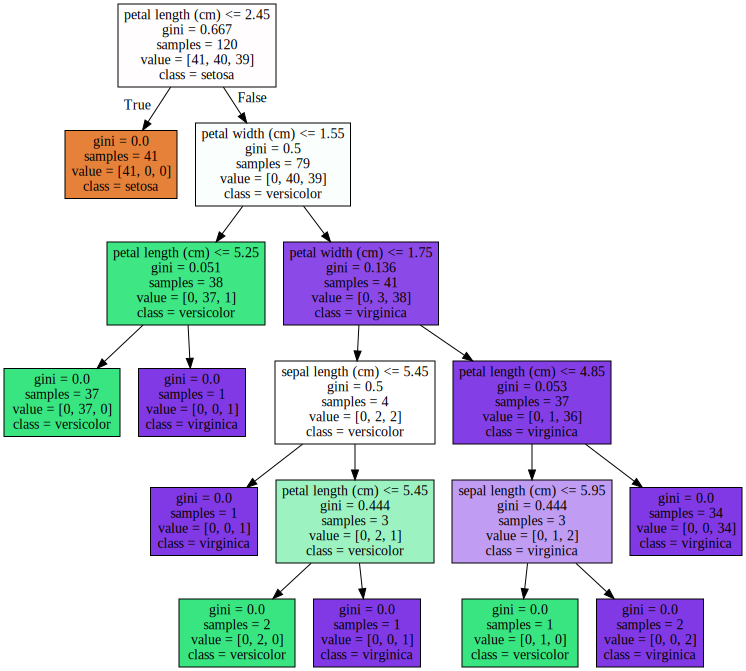

In [23]:
export_graphviz(
    dt_clf,out_file='tree3.dot',   #dt_clf 학습한 모델
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

import graphviz

with open('tree3.dot','r') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test,pred3)

0.9333333333333333

## Feature Importance

In [26]:
import seaborn as sns

In [27]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [29]:
import warnings
warnings.filterwarnings('ignore')

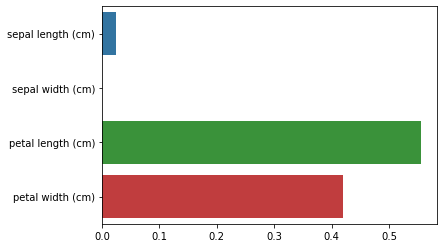

In [31]:
import matplotlib.pyplot as plt
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)
plt.show()